# Plots

Here, we explore some of the plots in the ProcessOptimizer package, and investigate the
options they include.

We also introduce uncertainty, since it is easier to understand when you can plot it.

This notebook is a part of the series about using ProcessOptimizer to guide a gold
mining expedition. For an overview, go to the markdown file gold_mining.md

We start out defining our ProcessOptimizer, and making the standard plot_objectives

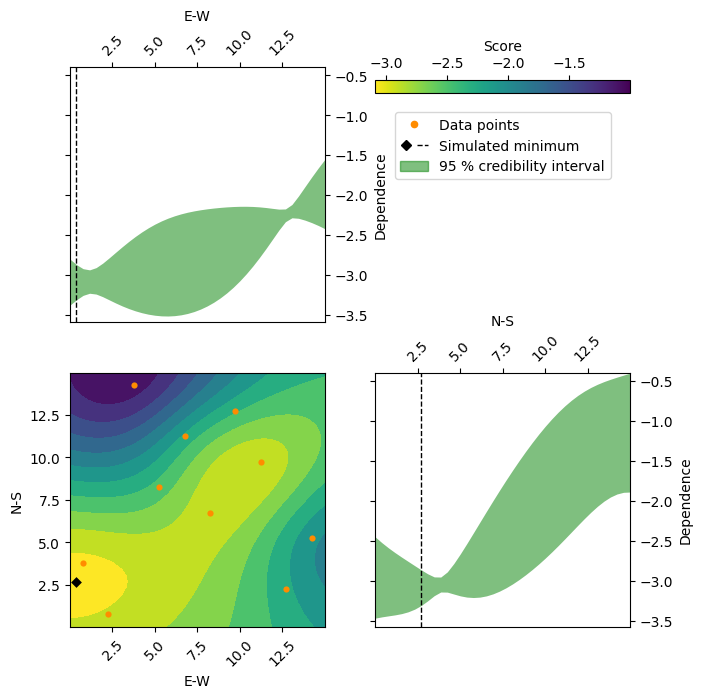

In [1]:
from typing import List

import matplotlib.pyplot as plt
import numpy as np
import ProcessOptimizer
from ProcessOptimizer.model_systems import gold_map


coordinates = [(0, 15.0),(0,15.0)]

# Starting the ProcessOptmizer, and telling it about our plot of land
opt = ProcessOptimizer.Optimizer(dimensions=coordinates)

# For each of the first 10 positions
for index in range(10):
    # Find the place to dig
    new_dig_site = opt.ask()
    # Digging for gold
    gold_found = gold_map.get_score(new_dig_site)
    # Telling the optimiser how much gold we found
    result = opt.tell(new_dig_site, gold_found)

# plotting
ProcessOptimizer.plot_objective(
    result=result,
    pars="expected_minimum_random",
    dimensions = ["E-W","N-S"],
);

The coloured plot in the lower left (2D plot) shows the internal model for how much gold
is will be found for each position.

The colour scale of the 2D plot is defined in the upper right. Notice that
this scale is negative. This is because the ProcessOptimizer is a minimizer, so in order
for it to work, we give the negative value for the amount of gold 

In the 2D plot, the sites where we have dug are marked as orange diamonds. The black
diamond is a reference point that we have chosen to be at the best expected dig site by
the parameter `pars="expected_minimum_random"`. We could also have chosen to have it
mark the best dig we have performed by `pars="result"`, or manually set the point by
giving it a list of coordinates - In this case, two, since the space is 2 dimensional.

The two line graphs in the top left and lower right shows the expected result of a dig
if we only change one of the coordinates away from the refernce point. The one on the
top left shows what happens of we only change the E-W coordinate. That is, if we move
horizontally in the 2D plot. The one on the lower right shows what happens if we change
the N-S coordinate, that is, moves vertically in the 2D plot.

If the space has more than two dimensions, we can't easily plot the full map of the
expected result - The monitor we plot it on only has two dimensions. Instead, the 2D
plots work similar to how the line graphs work: If we start at the reference point and
only change two coordinates, what is the expected result?

## Uncertainty

The other two subplot of the plot we just made show the 95% credibility
intervals. That is, for each position, the amount of gold found will be inside the green
band with a 95% probability.

We can also plot the uncertainty in the 2D plot:

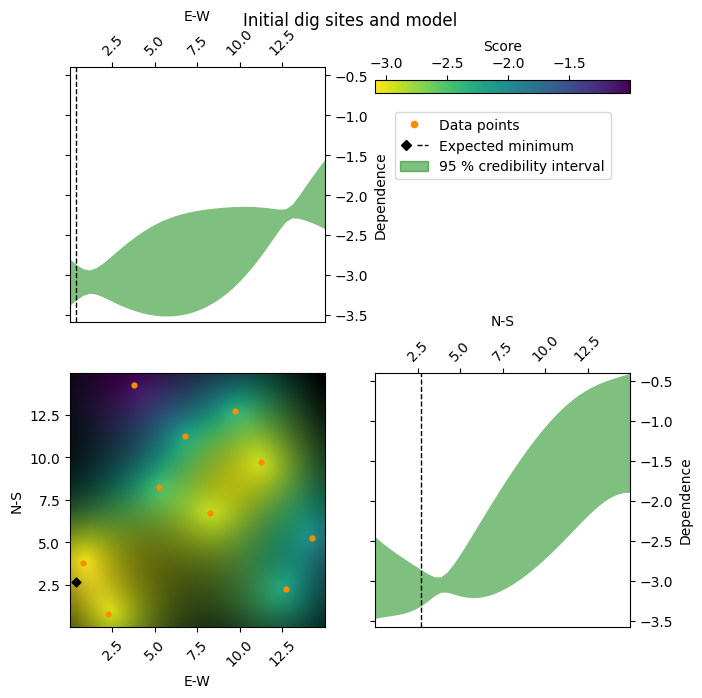

In [2]:
ProcessOptimizer.plot_objective(
    result=result,
    pars="expected_minimum",
    dimensions = ["E-W","N-S"],
    title="Initial dig sites and model",
    show_confidence=True,
    plot_options = {"interpolation": "bicubic"},
);

The intensity of the color in the lower left plot shows how certain the model is; the
darker the color, the higher uncertainty of how much gold will be found if we dig at
that site.

Let's try and add some more points, and look at how that affects the uncertainty.

Plotting model after 3 digs
Plotting model after 9 digs
Plotting model after 50 digs


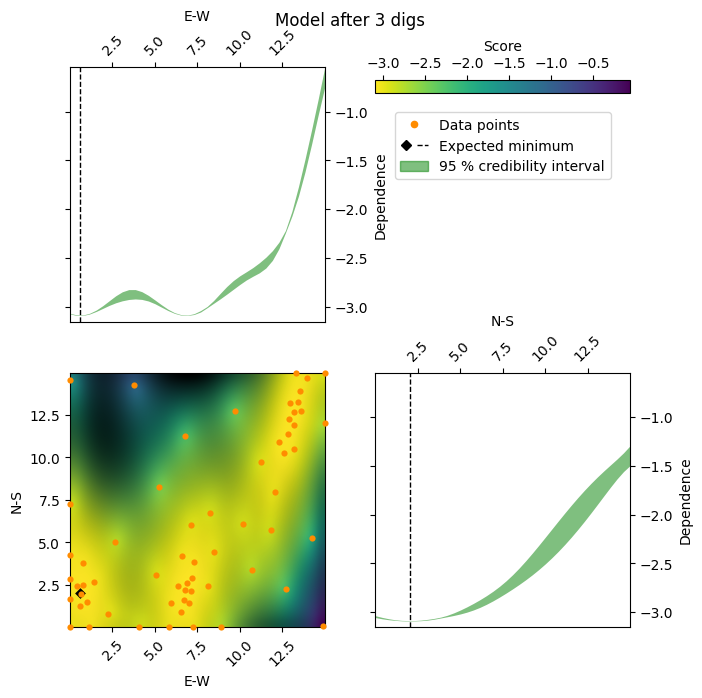

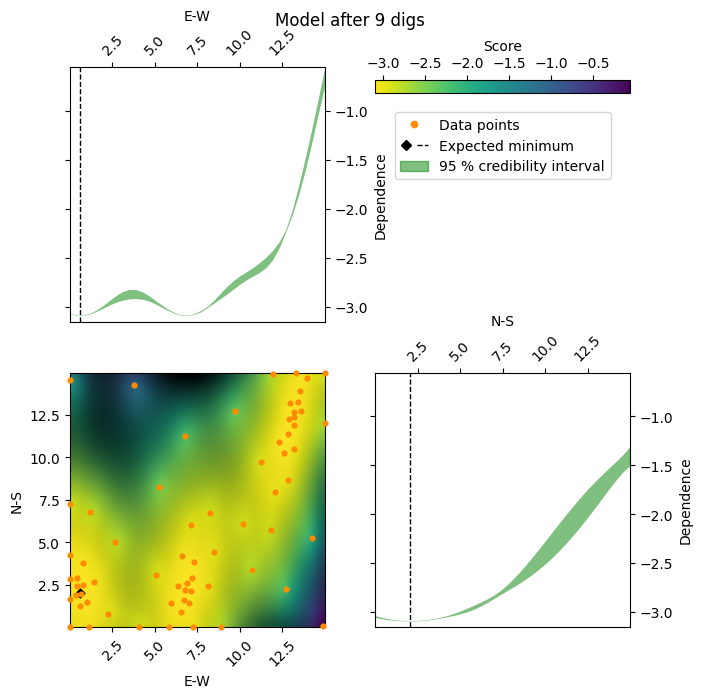

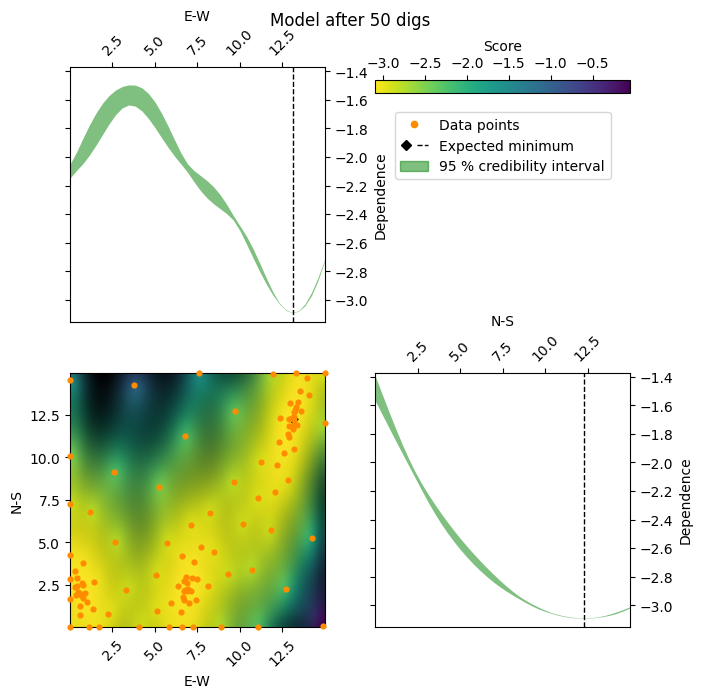

In [6]:
VERBOSE = True
dig_report = [3,9,50] # When to draw plots
for dig_number in range(max(dig_report)):
    new_point = opt.ask()
    gold_found = gold_map.get_score(new_point)
    #print(f"We dug at {new_point} and found {-gold_found} mg of gold")
    result = opt.tell(new_point,gold_found)
    if dig_number+1 in dig_report:
        print(f"Plotting model after {dig_number+1} digs")
        ProcessOptimizer.plot_objective(
            result=result,
            pars="expected_minimum",
            dimensions = ["E-W","N-S"],
            title=f"Model after {dig_number+1} digs",
            plot_options = {"interpolation": "bicubic"},
        );

Notice that the uncertainty in the 2D plots is relative to the minimum and maximum
uncertainty in the model. This becomes clear when you compare the
preceding plots. While the 1D plots shows that the largest magnitude of noise drops,
this isn't visible on the 2D plots. The area around `E-W=1, N-S=6.5` seems to be equally
black, in all 2D plots, but we can see on the N-S 1D plot that the uncertainty drops.

## Different ways of plotting uncertainty

By default, the uncertainty is plotted so that the minimum plotted uncertainty
corresponds to the full colour, while the maximum plotted uncertainty corresponds to
pure black. We can change this by setting the value of 
`plot_options["normalize_uncertainty]`. This should be a function that accepts three
inputs:
* A numpy.array containing the standard deviations of the points to be plotted
* The minimum standard deviation
* The maximum standard deviation

And returns an numpy.array with a value between 0 and 1 for each point to be plotted. 0
means that the color of the point will only reflect the expected value, 1 represents
that the point will be black, and value in between are darkened according to the value.

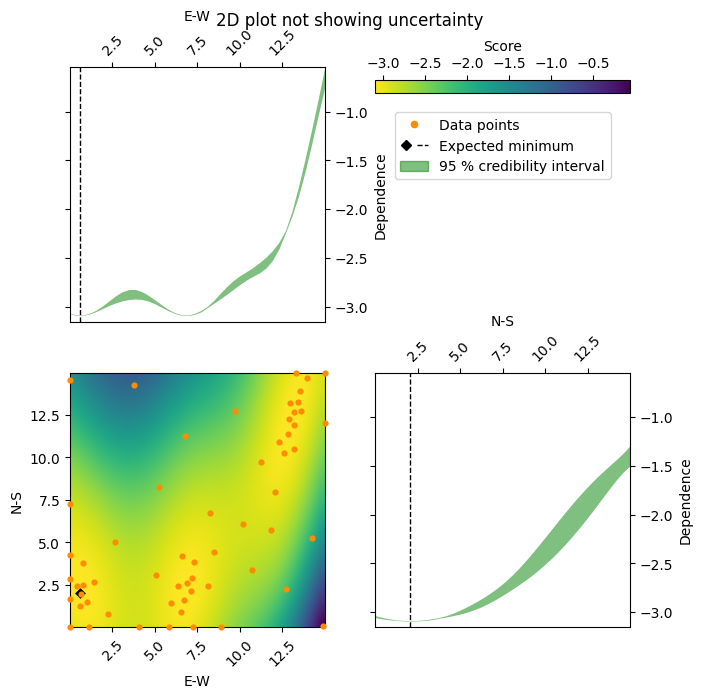

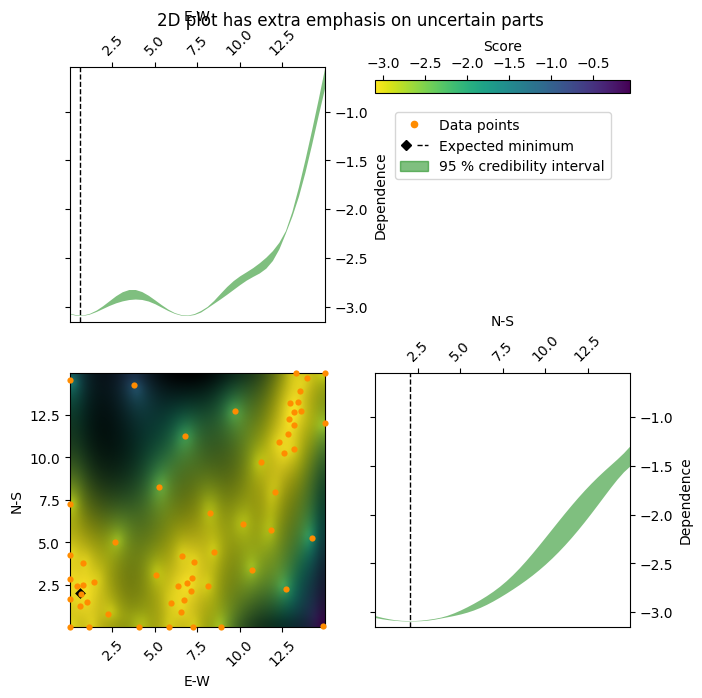

In [5]:
ProcessOptimizer.plot_objective(
    result=result,
    pars="expected_minimum",
    dimensions = ["E-W","N-S"],
    plot_options = {
        "interpolation": "bicubic",
        "normalize_uncertainty": lambda x,min,max: 0*x},
    title="2D plot not showing uncertainty",
)
ProcessOptimizer.plot_objective(
    result=result,
    pars="expected_minimum",
    dimensions = ["E-W","N-S"],
    plot_options = {
        "interpolation": "bicubic",
        "normalize_uncertainty": lambda x,min,max: ((x-min)/max)**(1/2)},
    title="2D plot has extra emphasis on uncertain parts",
    );